In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import datasets

data = pd.read_csv(r"ready_data.csv")
data.head()

,Startup_ID,Domain,Startup_Stage,Industry_Funder_Type,Investment_Amount,Valuation,Number_of_Investors,Year_Founded,Growth_Rate_Cent
0,ST100000,Healthcare,Early Revenue,VC Firm,1.335166e+09,6.621448e+09,50,2012,77.10
1,ST100001,Sustainability,MVP,Government Grant,2.781498e+09,8.363214e+09,36,2006,105.52
2,ST100002,Healthcare,Idea,Angel Investor,3.309032e+09,1.548270e+10,39,2016,190.47
3,ST100003,Blockchain,Idea,Angel Investor,4.050196e+09,1.268253e+10,44,2021,9.44
4,ST100004,Sustainability,Idea,Angel Investor,1.645080e+09,6.887966e+09,48,2011,192.00


In [3]:
# Feature Engineering

data = data.drop(columns=['Startup_ID']) # drop startupid

# bucketting
data['Growth_Class'] = pd.qcut(
    data['Growth_Rate_Cent'],
    q=3,
    labels=['Low', 'Medium', 'High']
)


# splitting x and y
y = data['Growth_Class']

X = data.drop(columns=['Growth_Rate_Cent', 'Growth_Class'])

X.head()

,Domain,Startup_Stage,Industry_Funder_Type,Investment_Amount,Valuation,Number_of_Investors,Year_Founded
0,Healthcare,Early Revenue,VC Firm,1.335166e+09,6.621448e+09,50,2012
1,Sustainability,MVP,Government Grant,2.781498e+09,8.363214e+09,36,2006
2,Healthcare,Idea,Angel Investor,3.309032e+09,1.548270e+10,39,2016
3,Blockchain,Idea,Angel Investor,4.050196e+09,1.268253e+10,44,2021
4,Sustainability,Idea,Angel Investor,1.645080e+09,6.887966e+09,48,2011


In [5]:
numeric_cols = [
    'Investment_Amount',
    'Valuation',
    'Number_of_Investors',
]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X


,Domain,Startup_Stage,Industry_Funder_Type,Investment_Amount,Valuation,Number_of_Investors,Year_Founded
0,Healthcare,Early Revenue,VC Firm,-0.786995,-0.246327,1.713896,2012
1,Sustainability,MVP,Government Grant,0.228941,0.071575,0.732845,2006
2,Healthcare,Idea,Angel Investor,0.599493,1.371002,0.943070,2016
3,Blockchain,Idea,Angel Investor,1.120103,0.859924,1.293446,2021
4,Sustainability,Idea,Angel Investor,-0.569304,-0.197683,1.573746,2011
...,...,...,...,...,...,...,...
4995,Sustainability,Prototype,Corporate R&D,1.095922,0.757884,0.242320,2002
4996,Blockchain,MVP,Corporate R&D,0.817597,0.567319,-0.808806,2000
4997,Smart Cities,Early Revenue,Government Grant,-1.425779,-1.303774,0.242320,2018
4998,Sustainability,Prototype,Angel Investor,-1.428381,-1.108894,-1.369407,2017


In [8]:
# one hot encoding
X = pd.get_dummies(X, drop_first=True)
X

,Investment_Amount,Valuation,Number_of_Investors,Year_Founded,Domain_AgriTech,Domain_Blockchain,Domain_Energy,Domain_Healthcare,Domain_IoT,Domain_Smart Cities,Domain_Sustainability,Startup_Stage_Idea,Startup_Stage_MVP,Startup_Stage_Prototype,Industry_Funder_Type_Corporate R&D,Industry_Funder_Type_Government Grant,Industry_Funder_Type_VC Firm
0,-0.786995,-0.246327,1.713896,2012,False,False,False,True,False,False,False,False,False,False,False,False,True
1,0.228941,0.071575,0.732845,2006,False,False,False,False,False,False,True,False,True,False,False,True,False
2,0.599493,1.371002,0.943070,2016,False,False,False,True,False,False,False,True,False,False,False,False,False
3,1.120103,0.859924,1.293446,2021,False,True,False,False,False,False,False,True,False,False,False,False,False
4,-0.569304,-0.197683,1.573746,2011,False,False,False,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.095922,0.757884,0.242320,2002,False,False,False,False,False,False,True,False,False,True,True,False,False
4996,0.817597,0.567319,-0.808806,2000,False,True,False,False,False,False,False,False,True,False,True,False,False
4997,-1.425779,-1.303774,0.242320,2018,False,False,False,False,False,True,False,False,False,False,False,True,False
4998,-1.428381,-1.108894,-1.369407,2017,False,False,False,False,False,False,True,False,False,True,False,False,False


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 17), (1000, 17), (4000,), (1000,))

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.32      0.29      0.30       347
         Low       0.31      0.29      0.30       335
      Medium       0.31      0.36      0.34       318

    accuracy                           0.31      1000
   macro avg       0.31      0.31      0.31      1000
weighted avg       0.31      0.31      0.31      1000



In [12]:
# shap analysis

import shap
# Create TreeExplainer for Random Forest
explainer = shap.TreeExplainer(clf)

# Compute SHAP values for test set
shap_values = explainer.shap_values(x_test)

In [13]:
shap_values.shape

(1000, 17, 3)

In [16]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_test)


In [17]:
print("X_test shape:", x_test.shape)
print("SHAP values shape:", np.array(shap_values).shape)
print("Class labels:", clf.classes_)

X_test shape: (1000, 17)
SHAP values shape: (1000, 17, 3)
Class labels: ['High' 'Low' 'Medium']



SHAP Feature Importance for class: High


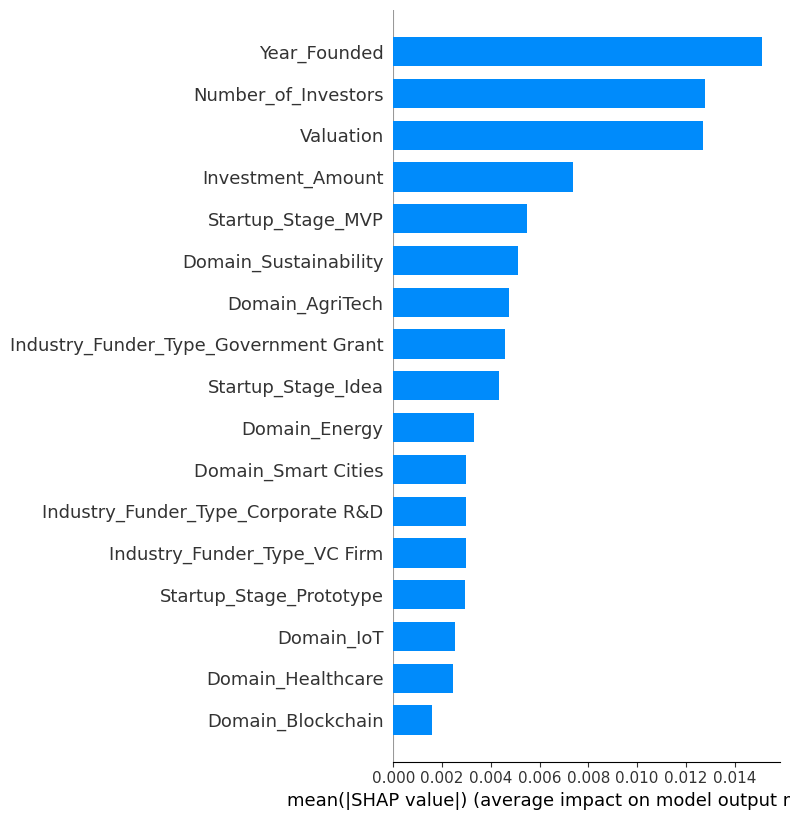


SHAP Feature Importance for class: Low


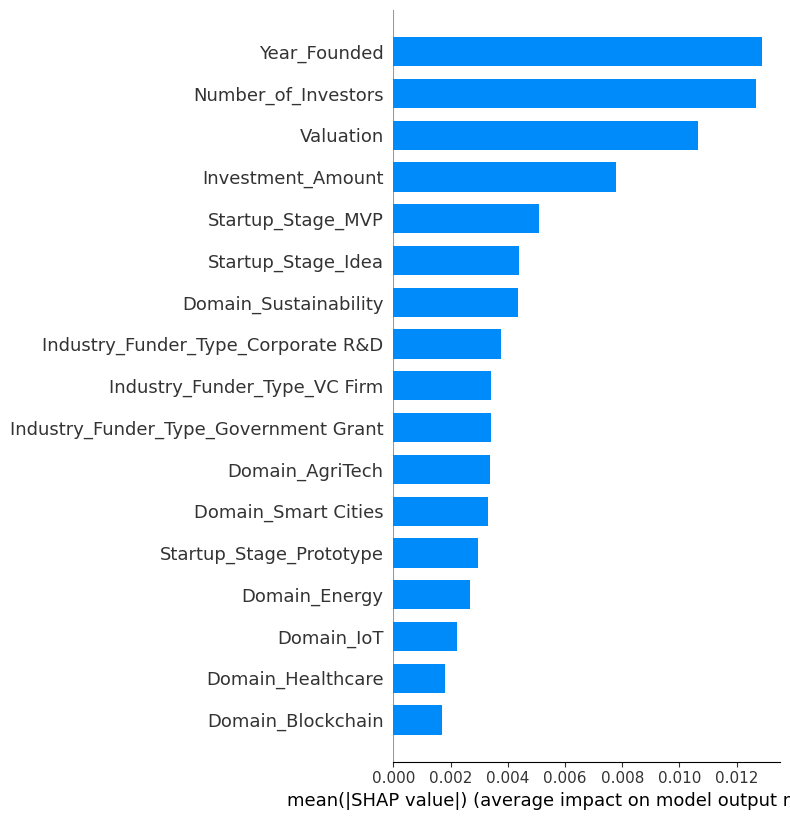


SHAP Feature Importance for class: Medium


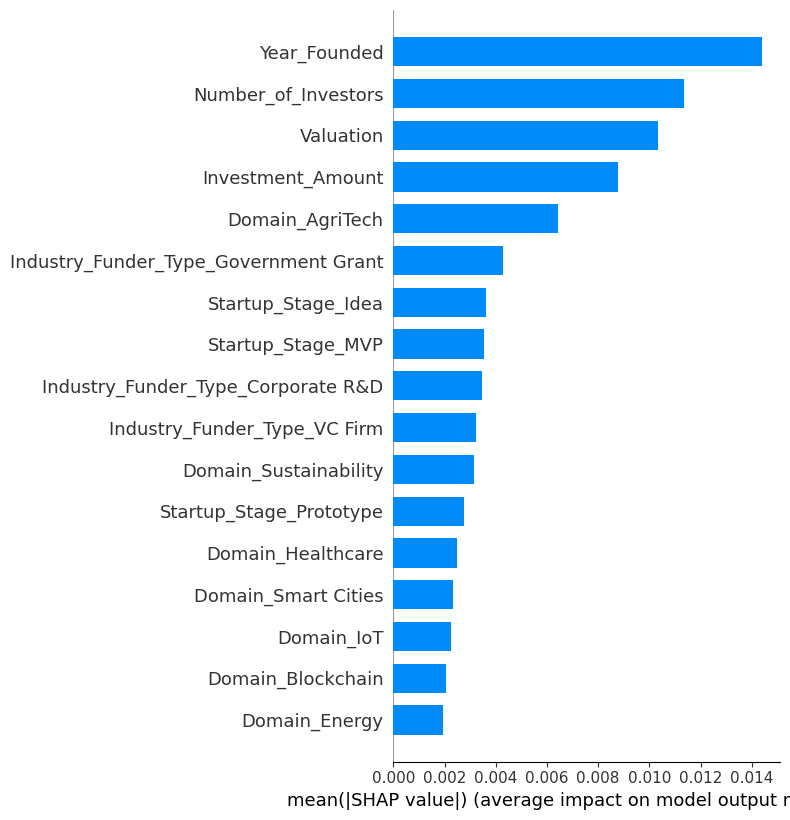

In [18]:
class_names = clf.classes_

for class_idx, class_name in enumerate(class_names):
    print(f"\nSHAP Feature Importance for class: {class_name}")

    shap.summary_plot(
        shap_values[:, :, class_idx],
        x_test,
        plot_type="bar",
        show=True
    )

In [19]:
import plotly.graph_objects as go

In [20]:
# class labels
class_names = clf.classes_   # ['High', 'Low', 'Medium']
feature_names = x_test.columns

# Mean absolute SHAP values per feature per class
shap_importance = {
    class_name: np.mean(np.abs(shap_values[:, :, idx]), axis=0)
    for idx, class_name in enumerate(class_names)
}

# Create DataFrame
shap_df = pd.DataFrame(shap_importance, index=feature_names)

# Convert to percentage contribution (row-wise)
shap_pct = shap_df.div(shap_df.sum(axis=1), axis=0) * 100

# Sort by total importance
shap_pct["Total"] = shap_pct.sum(axis=1)
shap_pct = shap_pct.sort_values("Total", ascending=False).drop(columns="Total")

shap_pct.head()


,High,Low,Medium
Number_of_Investors,34.774960,34.407317,30.817724
Industry_Funder_Type_VC Firm,30.821077,35.503211,33.675712
Investment_Amount,30.823776,32.460506,36.715718
Year_Founded,35.664484,30.380303,33.955214
Valuation,37.710003,31.595158,30.694839


In [21]:
fig = go.Figure()

colors = {
    "High": "#EF553B",
    "Medium": "#00CC96",
    "Low": "#636EFA"
}

for class_name in class_names:
    fig.add_trace(
        go.Bar(
            name=class_name,
            x=shap_pct.index,
            y=shap_pct[class_name],
            text=shap_pct[class_name].round(2).astype(str) + "%",
            textposition="inside",
            hovertemplate=
                "<b>Feature:</b> %{x}<br>"
                "<b>Class:</b> " + class_name + "<br>"
                "<b>Contribution:</b> %{y:.2f}%<extra></extra>",
            marker_color=colors[class_name]
        )
    )

fig.update_layout(
    title="SHAP Feature Contribution by Growth Class (Percentage)",
    xaxis_title="Features",
    yaxis_title="Percentage Contribution",
    barmode="stack",
    template="plotly_white",
    height=600,
    legend_title="Growth Class"
)

fig.show()
